# *- Convex Optimization*

## *- Exercises Series 1*

- Written by: Christos Nikou
- ID: 03400146 
- email: christosnikou@mail.ntua.gr / chrisnick92@gmail.com

## *Exercise 1*

Let $f:\mathbb{R^{1000\times 1000}}\to \mathbb{R}$ be the quadratic function given by $f(x) = \frac{1}{2}x^T\ A x - b^T x$, where $A\in \mathbb{R}^{1000\times 1000}$

$$A = \begin{pmatrix}
11 & -1 & 0 &\dots & 0\\
-1 & 11 & -1 & \ddots & 0\\
0 & \ddots & \ddots & \ddots & 0\\
0 & \dots & \ddots & \ddots & -1\\
0 & \dots & 0 & -1 & 11\\
\end{pmatrix}, \text{and}\quad b = \begin{pmatrix}10\\ 8 \\ \vdots\\ 8 \\ 10 \end{pmatrix}.
$$

<b>(a)</b> Prove that $f$ is strictly convex.

<b>(b)</b> Write a program about the methods of *steepest descent* and *conjugate gradient* for the quadratic case to determine the minimum value of $f$. Suppose your initial starting point is $x_0 = \begin{pmatrix}-1/2 \\ 0 \\ \vdots \\ 0 \\ 1/3\end{pmatrix}$. Compare the result of the two methods.

<b>(c)</b> The *Hilbert* matrix $H\in \mathbb{R}^{n\times n}$ is given by $h_{ij} = \frac{1}{i+j-1}.$ Apply the *steepest descent* and *conjugate gradient* algorithms in order to minimize the quadratic function $f:\mathbb{R}^n\to \mathbb{R}$ defined by $f(x) = \frac{1}{2}x^THx - b^Tx,$ where $b = \begin{pmatrix} 10\\ 2\\ \vdots \\ 2\\10\end{pmatrix},\, x_0 = \begin{pmatrix}-\frac{1}{2}\\ 0 \\ \vdots \\ 0 \\ 0 \end{pmatrix}$ and $n = 4^k$ for $k = 1,2,3.$ Does the algorithms converge? 

## *- Programming solutions*

We first begin by writing the functions for the two methods in the case of quadratic functions.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize_scalar

def quad_f(A, b, x):
    return (1/2)*np.matmul(np.matmul(x, A), x) - np.dot(b,x)

def full_quad_f(A,b,vals):
    values = np.array([])
    for val in vals:
        values = np.append(values, quad_f(A,b,val))
    return values

### *1. Steepest Descent*

In [2]:
def quad_steepest_descent(A, b, x0, epsilon = 1e-6, max_iter = 100000):
    # A is the positive definite matrix
    # x0 the starting point
    # epsilon defines the stopping criterion
    
    num_iter = 0
    r_prev = b - np.matmul(A, x0)
    x_prev = x0
    sequence = x0
    
    while True:
        ak = (r_prev @ r_prev)/(r_prev @ A @ r_prev)       #(np.matmul(np.matmul(r_prev, A), r_prev))
        x_next = x_prev + ak*r_prev
        r_next = r_prev - ak*A @ r_prev       # ak*np.matmul(A,r_prev)
        num_iter += 1
        sequence = np.vstack((sequence, x_next))
        
        if np.linalg.norm(r_next) < epsilon or\
        num_iter >= max_iter:
            break
        else:
            x_prev = x_next
            r_prev = r_next
            
    if num_iter >= max_iter:
        return num_iter, sequence, False
        
    return num_iter, sequence, True # number of iteration, estimated minimum point, first iter

### 2. *Conjugate Gradient*

In [3]:
def quad_conjugate_grad(A, b, x0, epsilon = 1e-6,
                       max_iter = 100000):
    # A is the positive definite matrix
    # x0 the starting point
    # epsilon defines the stopping criterion
    
    num_iter = 0
    r_prev = b - np.matmul(A, x0)
    p_prev = r_prev
    x_prev = x0
    sequence = x0
    
    while True:
        ak = (r_prev @ r_prev)/(p_prev @ A @ p_prev)
        x_next = x_prev + ak*p_prev
        r_next = r_prev -ak*A @ p_prev
        bk = -(r_next @ r_next)/(r_prev @ r_prev)
        p_next = r_next -bk*p_prev
        num_iter += 1
        sequence = np.vstack((sequence, x_next))
    
        if np.linalg.norm(r_next) < epsilon or\
        num_iter >= max_iter:
            break
        else:
            p_prev = p_next
            x_prev = x_next
            r_prev = r_next
            
    if num_iter >= max_iter:
        return num_iter, sequence, False
    
    return num_iter, sequence, True

<b>(b)</b> We now compare the two methods for the case where

$$A = \begin{pmatrix}
11 & -1 & 0 &\dots & 0\\
-1 & 11 & -1 & \ddots & 0\\
0 & \ddots & \ddots & \ddots & 0\\
0 & \dots & \ddots & \ddots & -1\\
0 & \dots & 0 & -1 & 11\\
\end{pmatrix}, \text{and}\quad b = \begin{pmatrix}10\\ 8 \\ \vdots\\ 8 \\ 10 \end{pmatrix}.
$$

and the starting point $x_0 = \begin{pmatrix}-1/2 \\ 0 \\ \vdots \\ 0 \\ 1/3\end{pmatrix}$.

In [4]:
A = 11*np.eye(N =1000) - np.eye(N =1000,k=1) - np.eye(N=1000,k=-1)
b1 = np.concatenate((np.array([10]), np.full(shape = (998,),fill_value = 8), np.array([10])))
x0 = np.concatenate((np.array([-1/2]), np.zeros(shape = (998,)), np.array([1/3])))

In [5]:
# Steepest descent test
epsilon=1e-9
num_iter,sequence,converged = quad_steepest_descent(A,b1,x0,epsilon=epsilon)

print(f"{5*'-'}> Steepest descent <{5*'-'}\n")
if converged:
    print(f"- {num_iter} iterations for convergence with precision more than {epsilon}")
    print(f"- First iteration: first 5 values: {sequence[1,:5]}, last 5 values: {sequence[1,-5:]}")
    print(f"- Final estimated point: first 5 values: {sequence[-1,:5]}, last 5 values: {sequence[-1,-5:]}")
else:
    print(f"- Max iter reached: {num_iter} and no convergence yet.")

-----> Steepest descent <-----

- 13 iterations for convergence with precision more than 1e-09
- First iteration: first 5 values: [1.22118262 0.8328303  0.88835232 0.88835232 0.88835232], last 5 values: [0.88835232 0.88835232 0.88835232 0.925367   1.03661225]
- Final estimated point: first 5 values: [0.99074787 0.89822662 0.88974491 0.88896736 0.88889608], last 5 values: [0.88889608 0.88896736 0.88974491 0.89822662 0.99074787]


In [6]:
# Conjugate gradients test

num_iter2,seq2,converged = quad_conjugate_grad(A,b1,x0,epsilon = epsilon)

print(f"{5*'-'}> Conjugate gradients <{5*'-'}\n")
if converged:
    print(f"- {num_iter2} iterations for convergence with precision more than {epsilon}")
    print(f"- First iteration: first 5 values: {seq2[1,:5]}, last 5 values: {seq2[1,-5:]}")
    print(f"- Final estimated point: first 5 values: {seq2[-1,:5]}, last 5 values: {seq2[-1,-5:]}")
else:
    print(f"- Max iter reached: {num_iter2} and no convergence yet.")

-----> Conjugate gradients <-----

- 11 iterations for convergence with precision more than 1e-09
- First iteration: first 5 values: [1.22118262 0.8328303  0.88835232 0.88835232 0.88835232], last 5 values: [0.88835232 0.88835232 0.88835232 0.925367   1.03661225]
- Final estimated point: first 5 values: [0.99074787 0.89822662 0.88974491 0.88896736 0.88889608], last 5 values: [0.88889608 0.88896736 0.88974491 0.89822662 0.99074787]


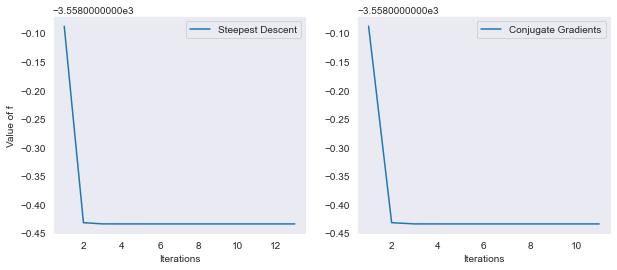

In [7]:
# Plotting the results

sns.set_style("dark")
fig,ax = plt.subplots(ncols = 2,figsize = (10,4))

ax[0].plot(range(1,num_iter+1), full_quad_f(A,b1,sequence[1:]),
       label = 'Steepest Descent')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Value of f')
ax[1].plot(range(1,num_iter2+1), full_quad_f(A,b1,seq2[1:]),
       label = 'Conjugate Gradients')
ax[1].set_xlabel('Iterations')

ax[0].legend()
ax[1].legend()

plt.show()

In [8]:
print(f"- Estimated minimum of Steepest descent: {quad_f(A,b1,sequence[-1])}")
print(f"- Estimated minimum of Conjugate gradients: {quad_f(A,b1,seq2[-1])}")

- Estimated minimum of Steepest descent: -3558.4341643046982
- Estimated minimum of Conjugate gradients: -3558.434164304692


<b>(c)</b> Now we compare the two methods for the *Hilbert matrix* $H$ given by $h_{ij} = \frac{1}{i+j-1}$ with $1\leq i,j \leq n=4^k, k=1,2,3$, constant point $b = \begin{pmatrix} 10\\ 2\\ \vdots \\ 2\\10\end{pmatrix}$ and starting point $x_0 = \begin{pmatrix}-\frac{1}{2}\\ 0 \\ \vdots \\ 0 \\ 0 \end{pmatrix}$.

In [9]:
# A function for Hilbert's matrix

def hilbert(n):
    x = np.arange(1, n+1) + np.arange(0, n)[:, np.newaxis]
    return 1.0/x

# A function for generating b,x0 for every case of k = 1,2,3.
def initial_values(k):
    x0 = np.concatenate(([-1/2], np.zeros(shape = (4**k-1))))
    b = np.concatenate(([10], 2*np.ones(shape = (4**k-2)), [10]))
    return b, x0

#### *- case n = 4*

In [10]:
H = hilbert(n=4)
b,x0 = initial_values(k=1)

In [11]:
# Steepest descent test
epsilon=1e-6

num_iter,seq,converged = quad_steepest_descent(H,b,x0,epsilon=epsilon,
                                              max_iter = 500000)

print(f"{5*'-'}> Steepest descent <{5*'-'}\n")

if converged:
    print(f"- {num_iter} iterations for convergence with precision more than {epsilon}")
    print(f"- Point in first iteration: {seq[1,:]}")
    print(f"- Point in last iteration: {seq[-1,:]}")
else:
    print(f"- Max iter reached: {num_iter} and no convergence yet.")

-----> Steepest descent <-----

- 97825 iterations for convergence with precision more than 1e-06
- Point in first iteration: [9.30350104 2.10075022 2.02294466 9.453376  ]
- Point in last iteration: [  -999.99974513  12599.99713352 -32039.99309813  21559.99551277]


In [12]:
# Conjugate gradient test

num_iter2,seq2,converged = quad_conjugate_grad(H,b,x0,epsilon = epsilon)

print(f"{5*'-'}> Conjugate gradients <{5*'-'}\n")

if converged:
    print(f"- {num_iter2} iterations for convergence with precision more than {epsilon}")
    print(f"- Point if first iteration: {seq2[1,:]}")
    print(f"- Point in last iteration: {seq2[-1,:]}")
else:
    print(f"- Max iter reached: {num_iter2} and no convergence yet.")

-----> Conjugate gradients <-----

- 4 iterations for convergence with precision more than 1e-06
- Point if first iteration: [9.30350104 2.10075022 2.02294466 9.453376  ]
- Point in last iteration: [ -1000.00000001  12599.99999999 -32040.          21559.99999999]


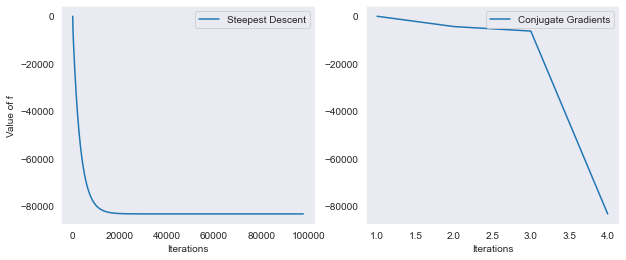

In [13]:
# Plotting the results

sns.set_style("dark")
fig,ax = plt.subplots(ncols = 2,figsize = (10,4))

ax[0].plot(range(1,num_iter+1), full_quad_f(H,b,seq[1:]),
       label = 'Steepest Descent')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Value of f')
ax[1].plot(range(1,num_iter2+1), full_quad_f(H,b,seq2[1:]),
       label = 'Conjugate Gradients')
ax[1].set_xlabel('Iterations')

ax[0].legend()
ax[1].legend()

plt.show()

In [14]:
print(f"- Estimated minimum of Steepest descent: {quad_f(H,b,seq[-1])}")
print(f"- Estimated minimum of Conjugate gradients: {quad_f(H,b,seq2[-1])}")

- Estimated minimum of Steepest descent: -83359.99999998607
- Estimated minimum of Conjugate gradients: -83359.99999998683


#### *- case n = 16*

In [15]:
H = hilbert(n=16)
b,x0 = initial_values(k=2)

In [16]:
# Steepest descent test
epsilon=1e-2

num_iter,seq,converged = quad_steepest_descent(H,b,x0,epsilon=epsilon)

print(f"{5*'-'}> Steepest descent <{5*'-'}\n")

if converged:
    print(f"- {num_iter} iterations for convergence with precision more than {epsilon}")
    print(f"- First iteration: first 5 values: {seq[1,:5]}, last 5 values: {seq[1,-5:]}")
    print(f"- Final estimated point: first 5 values: {seq[-1,:5]}, last 5 values: {seq[-1,-5:]}")
else:
    print(f"- Max iter reached: {num_iter} and no convergence yet.")

-----> Steepest descent <-----

- Max iter reached: 100000 and no convergence yet.


In [17]:
# Conjugate gradient test

num_iter2,seq2,converged = quad_conjugate_grad(H,b,x0,epsilon = epsilon)

print(f"{5*'-'}> Conjugate gradients <{5*'-'}\n")

if converged:
    print(f"- {num_iter2} iterations for convergence with precision more than {epsilon}")
    print(f"- First iteration: first 5 values: {seq2[1,:5]}, last 5 values: {seq2[1,-5:-1]}")
    print(f"- Final estimated point: first 5 values: {seq2[-1,:5]}, last 5 values: {seq2[-1,-5:]}")
else:
    print(f"- Max iter reached: {num_iter2} and no convergence yet.")

-----> Conjugate gradients <-----

- Max iter reached: 100000 and no convergence yet.


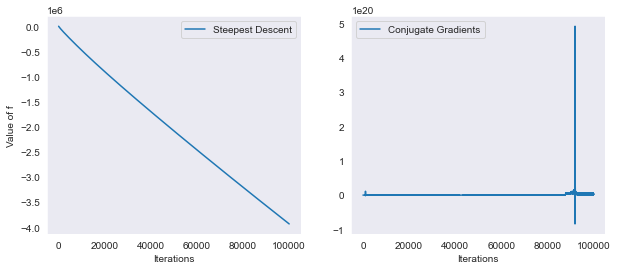

In [18]:
# Plotting the results

sns.set_style("dark")
fig,ax = plt.subplots(ncols = 2,figsize = (10,4))

ax[0].plot(range(1,num_iter+1), full_quad_f(H,b,seq[1:]),
       label = 'Steepest Descent')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Value of f')
ax[1].plot(range(1,num_iter2+1), full_quad_f(H,b,seq2[1:]),
       label = 'Conjugate Gradients')
ax[1].set_xlabel('Iterations')

ax[0].legend()
ax[1].legend()

plt.savefig('exer1c16.png')
plt.show()

#### *- case n = 64*

In [19]:
H = hilbert(n=64)
b,x0 = initial_values(k=3)

In [20]:
# Steepest descent test
epsilon=1e-6

num_iter,seq, converged = quad_steepest_descent(H,b,x0,epsilon=epsilon)

print(f"{5*'-'}> Steepest descent <{5*'-'}\n")
if converged:
    print(f"- {num_iter} iterations for convergence with precision more than {epsilon}")
    print(f"- First iteration: first 5 values: {seq[1,:5]}, last 5 values: {seq[1,-5:]}")
    print(f"- Final estimated point: first 5 values: {seq[-1,:5]}, last 5 values: {seq[-1,-5:]}")
else:
    print(f"- Max iter reached: {num_iter} and no convergence yet.")

-----> Steepest descent <-----

- Max iter reached: 100000 and no convergence yet.


In [21]:
# Conjugate gradient test

epsilon = 1e-6
num_iter2,seq2,converged = quad_conjugate_grad(H,b,x0,epsilon = epsilon)

print(f"{5*'-'}> Conjugate gradients <{5*'-'}\n")

if converged:
    print(f"- {num_iter2} iterations for convergence with precision more than {epsilon}")
    print(f"- First iteration: first 5 values: {seq2[1,:5]}, last 5 values: {seq2[1,-5:-1]}")
    print(f"- Final estimated point: first 5 values: {seq2[-1,:5]}, last 5 values: {seq2[-1,-5:]}")
else:
    print(f"- Max iter reached: {num_iter2} and no convergence yet.")

-----> Conjugate gradients <-----

- Max iter reached: 100000 and no convergence yet.


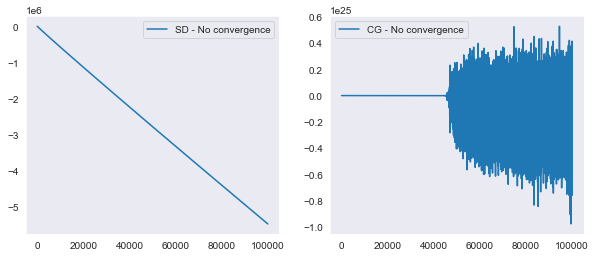

In [22]:
# Plotting the results

sns.set_style("dark")
fig,ax = plt.subplots(ncols = 2, figsize = (10,4))

ax[0].plot(range(num_iter+1), full_quad_f(H,b,seq),
       label = 'SD - No convergence')
ax[1].plot(range(num_iter2+1), full_quad_f(H,b,seq2),
       label = 'CG - No convergence')
ax[0].legend()
ax[1].legend()
plt.show()

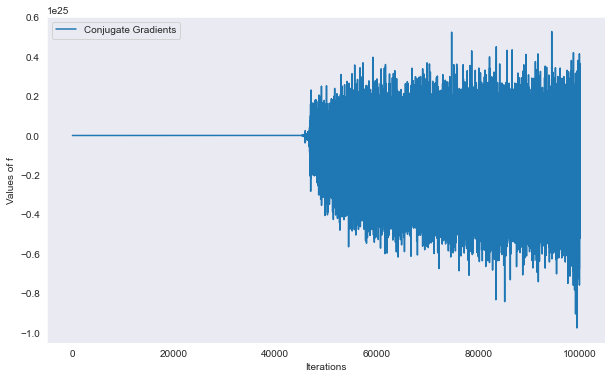

In [23]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(range(num_iter2+1), full_quad_f(H,b,seq2),
       label = 'Conjugate Gradients')
ax.set_xlabel('Iterations')
ax.set_ylabel('Values of f')
plt.legend()
plt.show()

## *- Exercise 2*

<b>(a)</b> Let $f(x,y) = 100(y-x^2)^2 + (1-x^2)^2 + 4$. Apply *Newton's Method* with starting point $(-1.2, 1)$ to solve the minimization 

problem $f(\bar{x},\bar{y}) = \min_{(x,y)^T\in \mathbb{R}^2}f(x,y)$.

<b>(b)</b> Modify *Newton's Method* by using a positive definite approximation of the *Hessian matrix* of $f$ (*Quasi Newton Method*). 

<b>(a)</b> It readily seen that the *Hessian Matrix* $H$ of $f$ evaluated at the point $(x,y)$ is given by

$$H(x,y) = \begin{pmatrix}1212x^2-400y-4 & -400x\\ -400x & 200 \end{pmatrix}$$

and the gradient $\nabla f$ of $f$ at $(x,y)$ is given by

$$\nabla f(x,y) = \bigl(404x^3 -400xy-4x,\,  200(y-x^2)\bigr).$$

In [24]:
# A function to calculate the Hessian Matrix
# of f at the point (x,y)
def Hess(x,y):
    return np.array([[1212*x**2-400*y-4, -400*x],
                    [-400*x, 200]])

# Gradient of f
def grad_f(x,y):
    return np.array([404*x**3-400*x*y-4*x, 200*(y-x**2)])

# evaluation of f
def f(x,y):
    return 100*(y-x**2)**2+(1-x**2)**2+4

def full_f(sequence):
    values = np.array([])
    for val in sequence:
        values = np.append(values, f(val[0],val[1]))
    return values

In [25]:
def newton_method(x0, epsilon = 1e-6,
                  max_iter = 100000):
    num_iter = 0
    x_prev = x0
    sequence = x0
    
    while True:
        x_new = x_prev - np.matmul(np.linalg.inv(Hess(x_prev[0],x_prev[1])),
                                   grad_f(x_prev[0],x_prev[1]))
        num_iter += 1
        sequence = np.vstack((sequence, x_new))
        if f(x_prev[0],x_prev[1]) - f(x_new[0],x_new[1]) < epsilon or\
        num_iter >= max_iter:
            break
        else:
            x_prev = x_new
            
    if num_iter >= max_iter:
        return num_iter, sequence, False
    else:
        return num_iter, sequence, True

In [26]:
x0 = np.array([-1.2, 1])

num_iter, sequence, p = newton_method(x0)

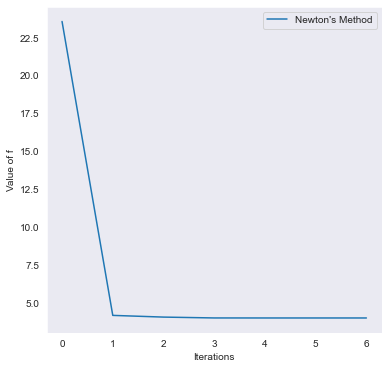

In [27]:
# Plotting the results

sns.set_style("dark")
fig,ax = plt.subplots(figsize = (6,6))

ax.plot(range(num_iter+1), full_f(sequence),
       label = "Newton's Method")
ax.set_xlabel('Iterations')
ax.set_ylabel('Value of f')
plt.legend()
plt.show()

In [28]:
print(f"- The method converges after {num_iter} iterations to the point {sequence[-1]}")
print(f"- The value of f at the point of convergence is equal to: {f(sequence[-1][0], sequence[-1][1])}")

- The method converges after 6 iterations to the point [-1.  1.]
- The value of f at the point of convergence is equal to: 4.0


<b>(b)</b> *Quasi Newton Method*

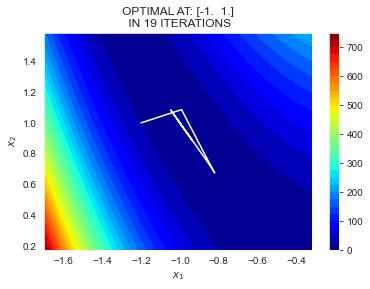

In [29]:
# Source: https://github.com/trsav/bfgs/blob/master/BFGS.py
def f2(x):
    '''
    FUNCTION TO BE OPTIMISED
    '''
    d = len(x)
    return 100*(x[1]-x[0]**2)**2+(1-x[0]**2)**2+4

def grad(f,x): 
    '''
    CENTRAL FINITE DIFFERENCE CALCULATION
    '''
    h = np.cbrt(np.finfo(float).eps)
    d = len(x)
    nabla = np.zeros(d)
    for i in range(d): 
        x_for = np.copy(x) 
        x_back = np.copy(x)
        x_for[i] += h 
        x_back[i] -= h 
        nabla[i] = (f2(x_for) - f2(x_back))/(2*h) 
    return nabla 

def line_search(f,x,p,nabla):
    '''
    BACKTRACK LINE SEARCH WITH WOLFE CONDITIONS
    '''
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    fx = f(x)
    x_new = x + a * p 
    nabla_new = grad(f,x_new)
    while f(x_new) >= fx + (c1*a*nabla.T@p) or nabla_new.T@p <= c2*nabla.T@p : 
        a *= 0.5
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
    return a


def BFGS(f,x0,max_it,plot=False):
    '''
    DESCRIPTION
    BFGS Quasi-Newton Method, implemented as described in Nocedal:
    Numerical Optimisation.
    INPUTS:
    f:      function to be optimised 
    x0:     intial guess
    max_it: maximum iterations 
    plot:   if the problem is 2 dimensional, returns 
            a trajectory plot of the optimisation scheme.
    OUTPUTS: 
    x:      the optimal solution of the function f 
    '''
    d = len(x0) # dimension of problem 
    nabla = grad(f,x0) # initial gradient 
    H = np.eye(d) # initial hessian
    x = x0[:]
    it = 2 
    if plot == True: 
        if d == 2: 
            x_store =  np.zeros((1,2)) # storing x values 
            x_store[0,:] = x 
        else: 
            print('Too many dimensions to produce trajectory plot!')
            plot = False

    while np.linalg.norm(nabla) > 1e-5: # while gradient is positive
        if it > max_it: 
            print('Maximum iterations reached!')
            break
        it += 1
        p = -H@nabla # search direction (Newton Method)
        a = line_search(f,x,p,nabla) # line search 
        s = a * p 
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
        y = nabla_new - nabla 
        y = np.array([y])
        s = np.array([s])
        y = np.reshape(y,(d,1))
        s = np.reshape(s,(d,1))
        r = 1/(y.T@s)
        li = (np.eye(d)-(r*((s@(y.T)))))
        ri = (np.eye(d)-(r*((y@(s.T)))))
        hess_inter = li@H@ri
        H = hess_inter + (r*((s@(s.T)))) # BFGS Update
        nabla = nabla_new[:] 
        x = x_new[:]
        if plot == True:
            x_store = np.append(x_store,[x],axis=0) # storing x
    if plot == True:
        x1 = np.linspace(min(x_store[:,0]-0.5),max(x_store[:,0]+0.5),30)
        x2 = np.linspace(min(x_store[:,1]-0.5),max(x_store[:,1]+0.5),30)
        X1,X2 = np.meshgrid(x1,x2)
        Z = f([X1,X2])
        plt.figure()
        plt.title('OPTIMAL AT: '+str(x_store[-1,:])+'\n IN '+str(len(x_store))+' ITERATIONS')
        plt.contourf(X1,X2,Z,30,cmap='jet')
        plt.colorbar()
        plt.plot(x_store[:,0],x_store[:,1],c='w')
        plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
        plt.show()
    return x


x_opt = BFGS(f2,x0,100,plot=True)

## *- Exercise 3*

>Write a program about *Frank - Wolfe*'s method for the minimization problem $\min_{(x,y)^T\in S}f(x,y) = f(\bar{x},\bar{y}),$ where $f(x,y)=100(y-x^2)^2+(1-x^2)^2+4,\, S = \bigl\{(x,y)^T\in \mathbb{R}^2:\, x^2+y^2\leq 2\bigr\}$. Use $(-1/2, 1/2)$ as a starting point and give an estimation (with more than 5 iterations) of the minimum value.

In [30]:
def g(a,x,y):
    return f((1-a)*x[0]+a*y[0], (1-a)*x[1]+a*y[1])

In [31]:
def frank_wolfe(x1, epsilon=1e-4, max_iter = 1000000):
    x = x1
    d =1
    deltas = d
    num_iters = 0
    seq = x
    while np.abs(d) > epsilon and num_iters < max_iter:
        
        # Step 2
        gdf = grad_f(x[0], x[1])
        y= -np.sqrt(2)*gdf/(np.sqrt((gdf**2).sum()))
        d = gdf @ (y - x)
        num_iters += 1
        
        # Step 3 - find the best step
        a = minimize_scalar(g, bounds = (0,1), method = 'bounded',args = (x,y)).x
        x = x+a*(y-x)
        seq = np.vstack([seq,x])
        deltas = np.vstack([deltas,d])
    return seq, deltas, num_iters

In [32]:
seq, deltas, num_iters = frank_wolfe(x1=np.array([-1/2,1/2]))

In [33]:
sum_num = 11
print(f"{5*'-'}> Summary of the first {sum_num} iterations <{5*'-'}\n")
for i,pt in enumerate(seq[:sum_num]):
    print(f"- Iter:{i}\tPoint:{seq[i]}\tValue of f:{f(seq[i,0],seq[i,1]):.3f}\tDelta:{deltas[i]}")

-----> Summary of the first 11 iterations <-----

- Iter:0	Point:[-0.5  0.5]	Value of f:10.812	Delta:[1.]
- Iter:1	Point:[-0.56378672  0.31593835]	Value of f:4.466	Delta:[-100.76108314]
- Iter:2	Point:[-0.57034265  0.31718848]	Value of f:4.462	Delta:[-0.9107577]
- Iter:3	Point:[-0.56831     0.31979681]	Value of f:4.459	Delta:[-1.99534028]
- Iter:4	Point:[-0.65951196  0.41132718]	Value of f:4.375	Delta:[-0.79607137]
- Iter:5	Point:[-0.64802924  0.41538357]	Value of f:4.339	Delta:[-10.65266316]
- Iter:6	Point:[-0.64750499  0.41810231]	Value of f:4.337	Delta:[-0.77998841]
- Iter:7	Point:[-0.65006142  0.41758374]	Value of f:4.336	Delta:[-0.85711285]
- Iter:8	Point:[-0.64927589  0.41964321]	Value of f:4.335	Delta:[-0.89300951]
- Iter:9	Point:[-0.65303902  0.42011544]	Value of f:4.333	Delta:[-0.70754739]
- Iter:10	Point:[-0.65170103  0.42170217]	Value of f:4.332	Delta:[-1.37937189]


In [34]:
print(f"- Total iters:{len(seq)}")

- Total iters:764


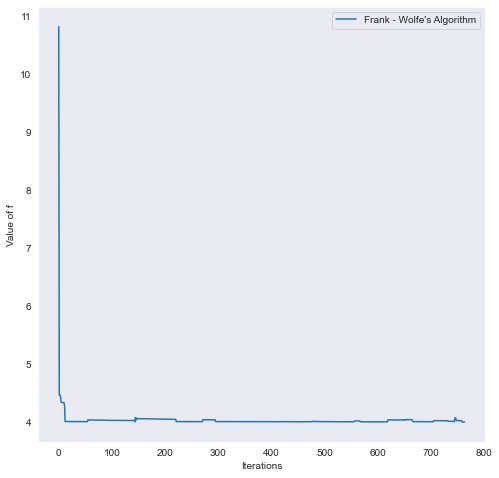

In [35]:
# Plotting the results

sns.set_style("dark")
fig,ax = plt.subplots(figsize = (8,8))

ax.plot(range(num_iters+1), full_f(seq),
       label = "Frank - Wolfe's Algorithm")
ax.set_xlabel('Iterations')
ax.set_ylabel('Value of f')
plt.legend()
plt.show()

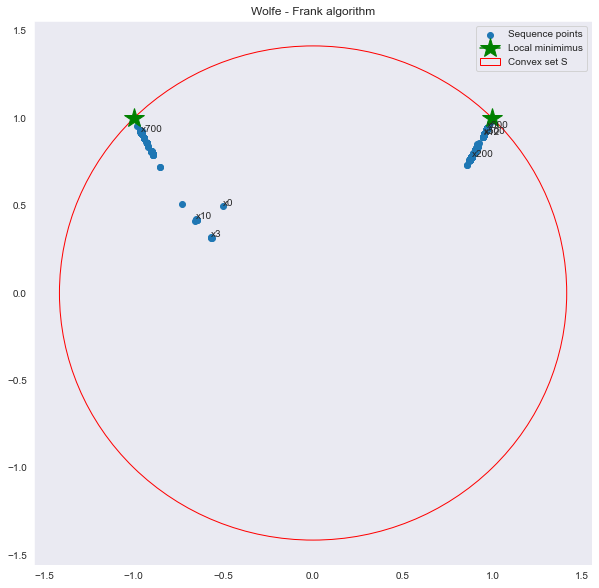

In [36]:
fig, ax = plt.subplots(figsize = (10,10))

S = plt.Circle((0,0), np.sqrt(2),
              edgecolor = 'r', fill = False, label = 'Convex set S')
ax.scatter(seq[:,0], seq[:,1], label = 'Sequence points')

for i in range(len(seq)):
    if i in [0,3,10,12,200,500, 600, 700]:
        ax.annotate('x'+str(i), (seq[i,0], seq[i,1]))

ax.plot(1,1,color = 'green', markersize = 20, marker ='*')
ax.plot(-1,1,color = 'green', markersize = 20, marker ='*',
       label = 'Local minimimus')
ax.add_patch(S)
ax.set_title('Wolfe - Frank algorithm')
plt.legend()
plt.savefig('SeqFrankWolf.png')
plt.show()

## *- Exercise 5*

>Let $f:S\subseteq \mathbb{R}^3 \to \mathbb{R}$, where $f(x,y,z) = (x-1)^2+(y-1)^2+(z-1)^2$ and $S = \bigl\{(x,y,z)^T:\, x^2+y^2+z^2\leq 1,\, x+y+z = 0\bigr\}$. Use *Newton's method* with starting point $x_0 = (0,\, 1.2,\, -1.2)^T$. Does the algorithm converge?

In [37]:
def func(x,y,z):
    return (x-1)**2 + (y-1)**2 + (z-1)**2
def gradient_f(x,y,z):
    return np.array([2*(x-1), 2*(y-1), 2*(z-1)])

def newton_method2(x0, epsilon = 1e-6,
                  max_iter = 100000):
    num_iter = 0
    x_prev = x0
    sequence = x0
    
    while True:
        x_new = x_prev - np.array([[1/2,0,0],
                                  [0,1/2,0],
                                  [0,0,1/2]]) @ gradient_f(x_prev[0],x_prev[1],x_prev[2])
        num_iter += 1
        sequence = np.vstack((sequence, x_new))
        
        if func(x_prev[0],x_prev[1],x_prev[2]) - func(x_new[0],x_new[1],x_new[2]) < epsilon or\
        num_iter >= max_iter:
            break
        else:
            x_prev = x_new
            
    if num_iter >= max_iter:
        return num_iter, sequence, False
    else:
        return num_iter, sequence, True

In [38]:
x0 = np.array([0, 1.2, -1.2])

num_iter, sequence, p = newton_method2(x0, epsilon = 1e-12)

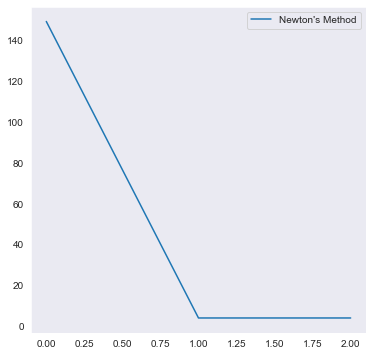

In [39]:
# Plotting the results

sns.set_style("dark")
fig,ax = plt.subplots(figsize = (6,6))

ax.plot(range(num_iter+1), full_f(sequence),
       label = "Newton's Method")

plt.legend()
plt.show()

In [40]:
print(f"- Point of convergence: {sequence[-1]} with estimated value: {func(sequence[-1,0],sequence[-1,1], sequence[-1,2])}.")

- Point of convergence: [1. 1. 1.] with estimated value: 0.0.
